<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Proyecto ¿Aprovechamos Nuestro potencial de energía eólica?

Librerias para importar

In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import georaster as gr
from osgeo import gdal
from affine import Affine

### 1.  Análisis preliminar

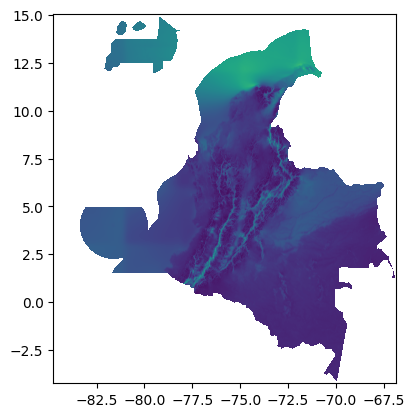

<Axes: >

In [10]:
fp = r'COL_wind-speed_100m.tif'
img = rasterio.open(fp)
show(img)

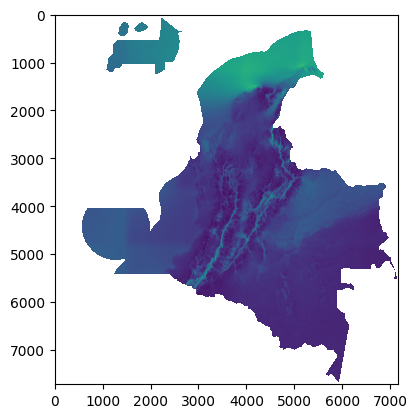

In [12]:
dataset = gdal.Open('COL_wind-speed_100m.tif', gdal.GA_ReadOnly)
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [14]:
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7d7f2631bc30> >

In [23]:
fp = r'COL_capacity-factor_IEC1.tif'
img = rasterio.open(fp)
x_cellsize = img.transform.a
y_cellsize = img.transform.e
shift = Affine(1, 0, x_cellsize / 2, 0, 1, y_cellsize / 2)
new_transform = img.transform * shift



Affine(0.002500000000000124, 0.0, -84.76592419281062,
       0.0, -0.002500000000000124, 15.063271872733901)

In [50]:
import georasters as gr

# Load data
raster = 'COL_wind-speed_100m.tif'
data = gr.from_file(raster)
data_speed=data.to_pandas()
data_speed.head(15)

,row,col,True,x,y
0,38,2209,8.161312,-79.243427,14.968269
1,39,2209,8.159723,-79.243427,14.965769
2,39,2210,8.159462,-79.240927,14.965769
3,39,2211,8.159331,-79.238427,14.965769
4,40,2208,8.158028,-79.245927,14.963269


In [51]:
data_speed.describe()

,row,col,True,x,y
count,2.154125e+07,2.154125e+07,2.154125e+07,2.154125e+07,2.154125e+07
mean,3.935272e+03,4.051972e+03,4.151445e+00,-7.463600e+01,5.225089e+00
std,1.671049e+03,1.442481e+03,2.480597e+00,3.606203e+00,4.177622e+00
min,3.800000e+01,5.480000e+02,7.615330e-02,-8.339593e+01,-4.234231e+00
25%,2.898000e+03,3.109000e+03,2.310068e+00,-7.699343e+01,2.275769e+00
50%,4.247000e+03,4.178000e+03,3.378509e+00,-7.432093e+01,4.445769e+00
75%,5.115000e+03,5.120000e+03,4.945083e+00,-7.196593e+01,7.818269e+00
max,7.719000e+03,7.157000e+03,1.826077e+01,-6.687343e+01,1.496827e+01


In [52]:
data_speed.shape

(21541250, 5)

In [37]:
import rioxarray as rxr
import xarray as xr

dataarray = rxr.open_rasterio('COL_wind-speed_100m.tif')
#dataarray = xr.open_rasterio('COL_wind-speed_100m.tif')

df = dataarray[0].to_pandas()
df.describe()

x,-84.764677,-84.762177,-84.759677,-84.757177,-84.754677,-84.752177,-84.749677,-84.747177,-84.744677,-84.742177,...,-66.894677,-66.892177,-66.889677,-66.887177,-66.884677,-66.882177,-66.879677,-66.877177,-66.874677,-66.872177
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.000000,17.000000,13.000000,12.000000,9.000000,8.000000,6.000000,5.000000,3.000000,2.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.788503,1.800239,1.812089,1.819057,1.821631,1.829286,1.824937,1.830089,1.833563,1.826110
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.011236,0.011261,0.013091,0.020861,0.024859,0.018764,0.014754,0.010508,0.011792,0.024621
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.770176,1.775131,1.795943,1.793034,1.802022,1.807986,1.808920,1.814901,1.820274,1.808700
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.781813,1.797096,1.802015,1.800640,1.807059,1.818857,1.813020,1.827052,1.828956,1.817405
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.786605,1.799132,1.806618,1.817657,1.814826,1.827762,1.824393,1.830457,1.837639,1.826110
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.794566,1.809792,1.826152,1.833321,1.816858,1.833517,1.834453,1.834422,1.840207,1.834815
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.812670,1.814113,1.834634,1.853976,1.880135,1.868806,1.844881,1.843614,1.842775,1.843519


In [ ]:
georasters.load_tiff(file)

In [41]:
df.shape

(7720, 7158)

(Utilice este espacio para describir su procedimiento).